In [1]:
using Plots
using JLD2 
using LatticeAlgorithms
using BlockDiagonals
using LinearAlgebra

# Fig 2a

## Load the data for optimized codes

In [2]:
Nrange = 2:10
optimized_distances = []
for N in Nrange
    push!(optimized_distances, load("data/optimized_codes/distance_opt_$(N)_v2.jld2")["optimized_distance"])
end

## Load the data for the repetition codes

In [3]:
distances_rep_rec = load("data/repetition_codes/distances_rep_rec.jld2");
distances_YY_rep_rec = load("data/repetition_codes/distances_YY_rep_rec.jld2");

## Get the distances of other example codes
5 modes: [5,1,3] with hex

7 modes: [7,1,3] with hex

9 modes: surface with hex

10 modes: [5,1,3] with D4

In [4]:
S_hex_T = [2 0; 
    1 sqrt(3)] / (12)^(1/4);

In [5]:
## 5 modes: [5,1,3] with hex

M_513 = [
    1 0 0 1 0 1 1 0 0 0; 
    0 2 0 0 0 0 0 0 0 0; 
    0 0 1 0 0 1 0 1 1 0; 
    0 0 0 2 0 0 0 0 0 0;
    1 0 0 0 1 0 0 1 0 1; 
    0 0 0 0 0 2 0 0 0 0; 
    0 1 1 0 0 0 1 0 0 1; 
    0 0 0 0 0 0 0 2 0 0; 
    0 0 0 0 0 0 0 0 2 0; 
    0 0 0 0 0 0 0 0 0 2
]/√2 * BlockDiagonal([S_hex_T for _ in 1 : 5])
# det(M_513)
# distances(M_513)
distance_513 = min(distances(M_513)...)

3.298908332373798

In [6]:
## 7 modes: [7,1,3] with hex


M_713 = [
    1 0 0 0 1 0 0 0 1 0 0 0 1 0; # ZIZIZIZ
    0 1 0 0 0 1 0 0 0 1 0 0 0 1; # XIXIXIX    
    0 0 1 0 1 0 0 0 0 0 1 0 1 0; # IZZIIZZ    
    0 0 0 1 0 1 0 0 0 0 0 1 0 1; # IXXIIXX
    0 0 0 0 2 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 2 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0 1 0 1 0 1 0 1 0; # IIIZZZZ    
    0 0 0 0 0 0 0 1 0 1 0 1 0 1; # IIIXXXX 
    0 0 0 0 0 0 0 0 2 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 2 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 2 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 2 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 2 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 2
]/√2 * BlockDiagonal([S_hex_T for _ in 1 : 7])
# det(M_713)
# distances(M_713)
distance_713 = min(distances(M_713)...)

3.298908332373796

In [7]:
## 9 modes: surface with hex

M_surf = surface_code_M(3) * BlockDiagonal([S_hex_T for _ in 1:9])
# det(M_surf)
# distances(M_surf)
distance_surf = min(distances(M_surf)...)


3.2989083323737938

In [8]:
## 10 modes: [5,1,3] with D4

S_D4_T = [1/sqrt(2) 0 0 0; 
    0 1/sqrt(2) 0 0; 
    0 0 1 0; 
    0 0 0 1] * [0 2 0 0; 
    -1 -1 1 1; 
    0 0 1 1; 
    0 1 -1 0];
M0 = [1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0;    # ZXXZI
    0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;      
    0 0 sqrt(2) 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 sqrt(2) 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0;      # IZXXZ
    0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0 sqrt(2) 0 0 0 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0 0 sqrt(2) 0 0 0 0 0 0 0 0 0 0 0 0; 
    1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0;      # ZIZXX
    0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0 0 0 0 0 sqrt(2) 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0 0 0 0 0 0 sqrt(2) 0 0 0 0 0 0 0 0; 
    0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0;      # XZIZX
    0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0; 
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 sqrt(2) 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 sqrt(2) 0 0 0 0; 
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0; 
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 sqrt(2) 0; 
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 sqrt(2)] / sqrt(2);

M_513_D4 = M0 * BlockDiagonal([S_D4_T for _ in 1:5]);

distance_M_513_D4 = min(distances(M_513_D4)...)

4.341607527349578

In [9]:
Nrange = 2:10
optimized_distances_old = []
for N in Nrange
    push!(optimized_distances_old, load("data/optimized_codes/distance_opt_$(N)_1000.jld2")["optimized_distance"])
end

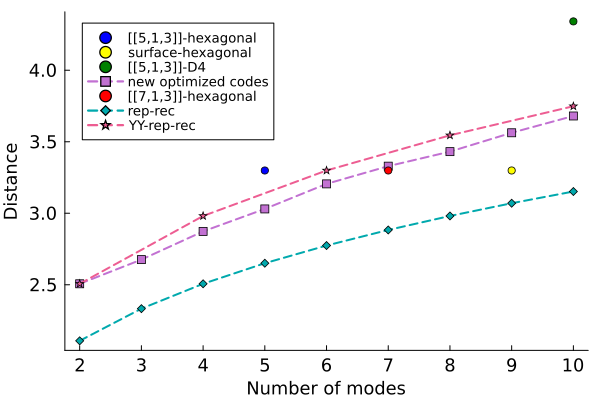

In [10]:
linewidth=2
plot()
scatter!([5], [distance_513], marker=:circle, markercolor=:blue, label="[[5,1,3]]-hexagonal")
# scatter!([7], [distance_713], marker=:circle, markercolor=:red, label="[[7,1,3]]-hexagonal")
scatter!([9], [distance_surf], marker=:circle, markercolor=:yellow, label="surface-hexagonal")
scatter!([10], [distance_M_513_D4], marker=:circle, markercolor=:green, label="[[5,1,3]]-D4")
plot!(Nrange, -optimized_distances, marker=:square, label="new optimized codes", linewidth=linewidth, linestyle=:dash)
# plot!(Nrange, -optimized_distances_old, marker=:square, label="old optimized codes", linewidth=linewidth, linestyle=:dash)
scatter!([7], [distance_713], marker=:circle, markercolor=:red, label="[[7,1,3]]-hexagonal")

plot!(distances_rep_rec["Nrange"][2:end], distances_rep_rec["dX_list"][2:end], marker=:diamond, label="rep-rec", linewidth=linewidth, linestyle=:dash)
plot!(2*distances_YY_rep_rec["Nrange"][1:5], distances_YY_rep_rec["dX_list"][1:5], marker=:star, label="YY-rep-rec", linewidth=linewidth, linestyle=:dash)



xlabel!("Number of modes")
ylabel!("Distance")
plot!(grid=false, 
    tickfontsize=12, 
    labelfontsize=12, 
    legendfontsize=9,
    legend=:topleft,
    xticks = 2:10
)


In [11]:
savefig("plots/comparison_optimized_distances_comparison.pdf");

# Fig 2b

In [12]:
num_samples = 1e6
σrange = range(0.4, 0.8, 50)
σind = 15 ;
σrange[σind]

0.5142857142857142

## Load the data for optimized codes

In [13]:
data_optimized = load("data/optimized_codes/fidelity_optimized_codes_$σind.jld2")
fidelities_optimized = [val[1] for (_, val) in sort(data_optimized["fidelities"])]
Nrange_optimized = data_optimized["Nrange"]
σ_optimized = data_optimized["σrange"][1] ; 


## Load the data for example codes

In [14]:
data_examples = load("data/example_codes/fidelity_examples_$σind.jld2")
Nrange_examples = data_examples["Nrange"]
fidelities_examples = [0.0 for _ in 1 : length(Nrange_examples)]
for (key, val) in data_examples["fidelities"]
    N_ind = findall(x->x==key[2], Nrange_examples)[1]
    fidelities_examples[N_ind] = val[1]
end
σ_examples = data_examples["σrange"][1] ; 
@assert σ_examples ≈ σ_optimized

## Load the data for repetition codes

In [15]:
data_rep_rec = load("data/repetition_codes/fidelity_rep_rec.jld2")
σrange = data_rep_rec["σrange"]
p0list_rep_rec = data_rep_rec["p0list"]
fidelities_rep_rec = p0list_rep_rec[σind]
Nrange_rep_rec = data_rep_rec["Nrange"];

data_YY_rep_rec = load("data/repetition_codes/fidelity_YY_rep_rec.jld2")
σrange = data_YY_rep_rec["σrange"]
p0list_YY_rep_rec = data_YY_rep_rec["p0list"]
fidelities_YY_rep_rec = p0list_YY_rep_rec[σind]
Nrange_YY_rep_rec = data_YY_rep_rec["Nrange"];


In [16]:
# linewidth=2
# plot()
# scatter!([Nrange_examples[1]], [fidelities_examples[1]], marker=:circle, markercolor=:blue, label="[5,1,3]")
# # scatter!([Nrange_examples[2]], [fidelities_examples[2]], marker=:circle, markercolor=:red, label="[7,1,3]")
# scatter!([Nrange_examples[3]], [fidelities_examples[3]], marker=:circle, markercolor=:yellow, label="surface code")
# scatter!([Nrange_examples[4]], [fidelities_examples[4]], marker=:circle, markercolor=:green, label="[5,1,3] with D4")

# plot!(Nrange_optimized, fidelities_optimized, marker=:square, label="optimized codes", linewidth=linewidth, linestyle=:dash)

# scatter!([Nrange_examples[2]], [fidelities_examples[2]], marker=:circle, markercolor=:red, label="[7,1,3]")

# plot!(Nrange_rep_rec[2:end], fidelities_rep_rec[2:end], marker=:diamond, label="tess2N", linewidth=linewidth, linestyle=:dash)
# plot!(2Nrange_YY_rep_rec[1:5], fidelities_YY_rep_rec[1:5], marker=:star, label="tess4N", linewidth=linewidth, linestyle=:dash)

# xlabel!("Number of modes")
# ylabel!("Fidelity")
# pt = plot!(grid=false, 
#     tickfontsize=12, 
#     labelfontsize=12, 
#     legend=false,
#     xticks = 2:10,
# )


In [17]:
# savefig("plots/comparison_optimized_fidelities.pdf") ; 

In [18]:
data_optimized_v2 = load("data/optimized_codes/fidelity_optimized_codes_v2.jld2")
fidelities_optimized_v2 = [val[1] for (_, val) in sort(data_optimized_v2["fidelities"])] ;
Nrange_optimized = data_optimized["Nrange"]
σ_optimized = data_optimized["σrange"][1] ; 


In [19]:
for (key, val) in sort(data_optimized_v2["fidelities"])
    println(key, " ", val)
end

(2, 0.46530612244897956) [0.9384920000061495, 0.020519999999999868, 0.02047199999999982, 0.020515999999999864]
(2, 0.4816326530612245) [0.9211320000056503, 0.02612300000000547, 0.026288000000005637, 0.026457000000005806]
(2, 0.49795918367346936) [0.9025410000051157, 0.0324540000000118, 0.03256600000001191, 0.032439000000011785]
(2, 0.5142857142857142) [0.8830370000045549, 0.03898600000001833, 0.038800000000018146, 0.03917700000001852]
(2, 0.5306122448979592) [0.8613620000039316, 0.046389000000025736, 0.04623300000002558, 0.04601600000002536]
(2, 0.5469387755102041) [0.8383870000032709, 0.0541490000000335, 0.05372100000003307, 0.05374300000003309]
(3, 0.46530612244897956) [0.9464150000063773, 0.018628999999997977, 0.017378999999996727, 0.017576999999996925]
(3, 0.4816326530612245) [0.9295810000058933, 0.024415000000003764, 0.02280200000000215, 0.02320200000000255]
(3, 0.49795918367346936) [0.9112580000053664, 0.030693000000010042, 0.029379000000008728, 0.02867000000000802]
(3, 0.5142857

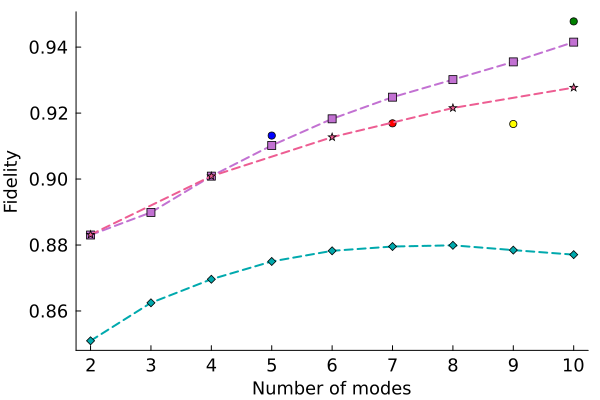

In [20]:
linewidth=2
plot()
scatter!([Nrange_examples[1]], [fidelities_examples[1]], marker=:circle, markercolor=:blue, label="[5,1,3]")
# scatter!([Nrange_examples[2]], [fidelities_examples[2]], marker=:circle, markercolor=:red, label="[7,1,3]")
scatter!([Nrange_examples[3]], [fidelities_examples[3]], marker=:circle, markercolor=:yellow, label="surface code")
scatter!([Nrange_examples[4]], [fidelities_examples[4]], marker=:circle, markercolor=:green, label="[5,1,3] with D4")

plot!(Nrange_optimized, fidelities_optimized_v2[4:6:end], marker=:square, label="optimized codes", linewidth=linewidth, linestyle=:dash)

scatter!([Nrange_examples[2]], [fidelities_examples[2]], marker=:circle, markercolor=:red, label="[7,1,3]")

plot!(Nrange_rep_rec[2:end], fidelities_rep_rec[2:end], marker=:diamond, label="tess2N", linewidth=linewidth, linestyle=:dash)
plot!(2Nrange_YY_rep_rec[1:5], fidelities_YY_rep_rec[1:5], marker=:star, label="tess4N", linewidth=linewidth, linestyle=:dash)

xlabel!("Number of modes")
ylabel!("Fidelity")
pt = plot!(grid=false, 
    tickfontsize=12, 
    labelfontsize=12, 
    legend=false,
    xticks = 2:10,
)

In [21]:
savefig("plots/comparison_optimized_fidelities_v2.pdf");

# Reproduce the distances for N=3, N=7 and N=9

In [22]:
function get_X_Y_r(N; dgs = 3)
    Msq = BlockDiagonal([[√2 0; 0 √2], [[1 0; 0 1] for _ in 2:N]...]);
    T = basis_transformation(N);

    data = load("data/optimized_codes/distance_opt_$(N)_v2.jld2")
    S = data["S_opt"] ; 
    O1, Z, O2 = bloch_messiah(S) ; 

    r = diag(Z)[1:2:end]

    logO2 = log(T * O2 * transpose(T))
    X = logO2[1:N, 1:N]
    Y = logO2[1:N, N+1:end]    

    if dgs == 0
    else
        X = round.(X, digits=dgs)
        Y = round.(Y, digits=dgs)
        r = round.(r, digits=dgs)
    end
    
    return X, Y, r, T, Msq
end

get_X_Y_r (generic function with 1 method)

In [23]:
X, Y, r, T, Msq = get_X_Y_r(3); 

show(stdout, "text/plain", X); println()
show(stdout, "text/plain", Y); println()
show(stdout, "text/plain", r); println()

Z0 = diagm([r..., (1 ./ r)...])

O2 = transpose(T) * (exp([X Y; -Y X])) * T
M = Msq * transpose(O2) * transpose(T) * Z0 * T

println(distances(M))

3×3 Matrix{Float64}:
 -0.0    -0.129   0.303
  0.129   0.0    -0.804
 -0.303   0.804  -0.0
3×3 Matrix{Float64}:
  1.126  -0.674  -1.101
 -0.674   0.556   0.252
 -1.101   0.252   0.235
3-element Vector{Float64}:
 0.329
 3.018
 0.326
[2.673864899024463, 2.6709470317282666, 2.674811082428367]


In [24]:
X, Y, r, T, Msq = get_X_Y_r(7); 

show(stdout, "text/plain", X); println()
show(stdout, "text/plain", Y); println()
show(stdout, "text/plain", r); println()

Z0 = diagm([r..., (1 ./ r)...])

O2 = transpose(T) * (exp([X Y; -Y X])) * T
M = Msq * transpose(O2) * transpose(T) * Z0 * T

println(distances(M))

7×7 Matrix{Float64}:
 -0.0     0.08    0.237  -0.221  0.599  -0.597  -0.22
 -0.08   -0.0    -0.25    0.261  0.652  -0.556  -0.074
 -0.237   0.25    0.0    -0.884  0.039  -0.121   0.335
  0.221  -0.261   0.884  -0.0    0.796  -0.431  -0.199
 -0.599  -0.652  -0.039  -0.796  0.0    -0.506  -0.239
  0.597   0.556   0.121   0.431  0.506   0.0    -0.105
  0.22    0.074  -0.335   0.199  0.239   0.105  -0.0
7×7 Matrix{Float64}:
 -0.356  -0.519  -0.077  -0.616  -0.256   0.374   0.826
 -0.519  -0.661  -0.073   0.527   0.3     0.239   0.629
 -0.077  -0.073  -1.209   0.381  -0.201   0.014  -0.223
 -0.616   0.527   0.381  -0.621  -0.67    1.313  -0.129
 -0.256   0.3    -0.201  -0.67   -0.992  -0.253  -0.246
  0.374   0.239   0.014   1.313  -0.253  -0.114   0.184
  0.826   0.629  -0.223  -0.129  -0.246   0.184  -0.882
7-element Vector{Float64}:
 0.362
 2.65
 2.613
 2.471
 0.382
 0.366
 0.341
[3.3286082478956325, 3.3263824298735205, 3.3282435333613267]


In [25]:
X, Y, r, T, Msq = get_X_Y_r(9); 

show(stdout, "text/plain", X); println()
show(stdout, "text/plain", Y); println()
show(stdout, "text/plain", r); println()

Z0 = diagm([r..., (1 ./ r)...])

O2 = transpose(T) * (exp([X Y; -Y X])) * T
M = Msq * transpose(O2) * transpose(T) * Z0 * T

println(distances(M))

9×9 Matrix{Float64}:
  0.0     0.334  -0.761   0.958  -0.031   0.347   0.322   0.098   0.064
 -0.334   0.0    -0.072   0.755   0.162   0.83    0.534   0.207   0.557
  0.761   0.072   0.0     0.094   0.81    0.121  -0.415   0.422   0.155
 -0.958  -0.755  -0.094   0.0     0.079  -0.879   0.213  -0.098   0.553
  0.031  -0.162  -0.81   -0.079  -0.0     0.379  -0.444  -0.081   0.18
 -0.347  -0.83   -0.121   0.879  -0.379  -0.0    -0.356   0.022   0.194
 -0.322  -0.534   0.415  -0.213   0.444   0.356  -0.0    -0.001  -0.538
 -0.098  -0.207  -0.422   0.098   0.081  -0.022   0.001   0.0     0.167
 -0.064  -0.557  -0.155  -0.553  -0.18   -0.194   0.538  -0.167  -0.0
9×9 Matrix{Float64}:
  0.377   0.298  -0.2     0.225  -0.411   0.01    0.072   0.438  -0.261
  0.298   0.51   -0.112   0.706   0.324   0.366  -0.349  -0.207  -0.948
 -0.2    -0.112  -0.181   0.233   0.265  -0.051   0.783  -0.436   0.379
  0.225   0.706   0.233  -0.325   0.112  -0.157   0.171   0.343  -0.012
 -0.411   0.324   0.265  